# Temporal Difference Plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from herringbone import MDP, Sarsa, QLearning, DeepQLearning

All initialization tests passed.
imported herringbone without any errors :)


In [2]:
state_config = "herringbone/env_core/config/state_config.json"
map_ = "herringbone/env_core/maps/danger_holes.csv"
action_config = "herringbone/env_core/config/action_config.json"

seed = 42

CPU times: user 4min 5s, sys: 238 ms, total: 4min 5s
Wall time: 4min 5s


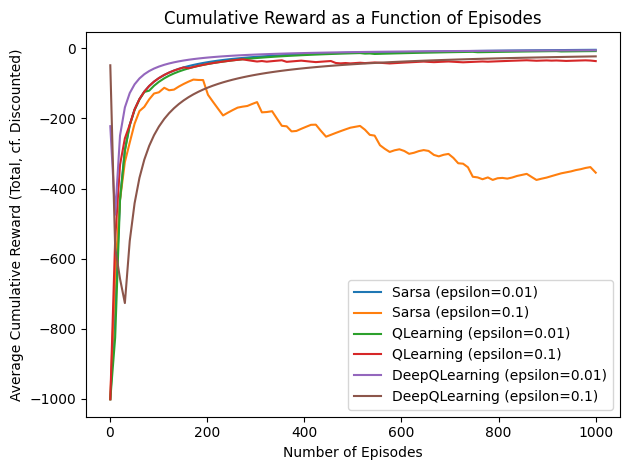

In [3]:
%%time

def accumulate_reward(algorithm, epsilon):
    num_episode = np.linspace(1, 1_000, 100, dtype=int)
    return_avg = []

    for n in num_episode:
        model = algorithm(
            num_episodes=n,
            mdp=MDP(
                state_config=state_config,
                map=map_,
                action_config=action_config,
                seed=seed,
            ),
            epsilon=epsilon
        )
        model.run()
        return_avg.append(sum(model.rewards))

    return num_episode, return_avg / num_episode

 
plt.figure(dpi=100)

for algo in [Sarsa, QLearning, DeepQLearning]:
    plt.plot(*accumulate_reward(algorithm=algo, epsilon=.01), label=f'{algo.__name__} (epsilon=0.01)')
    plt.plot(*accumulate_reward(algorithm=algo, epsilon=.1), label=f'{algo.__name__} (epsilon=0.1)')

plt.xlabel('Number of Episodes')
plt.ylabel('Average Cumulative Reward (Total, cf. Discounted)')
plt.title('Cumulative Reward as a Function of Episodes')
plt.legend()

plt.tight_layout()

CPU times: user 26.7 s, sys: 180 ms, total: 26.8 s
Wall time: 26.8 s


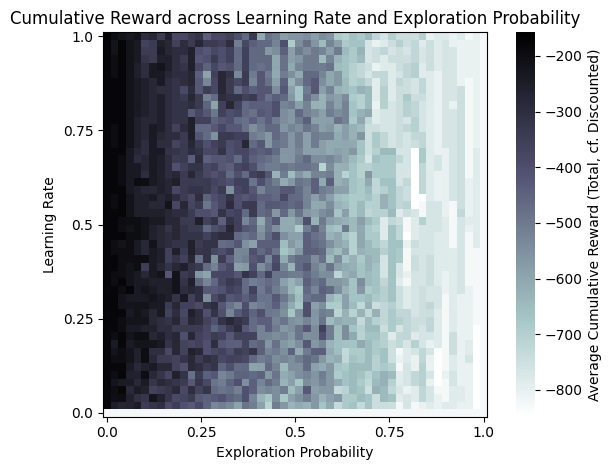

In [4]:
%%time

def compute_return(algorithm):
    num_episodes = 50
    alpha = np.linspace(0, 1, 50)
    epsilon = np.linspace(0, 1, 50)
    return_avg = np.zeros((len(alpha), len(epsilon)))

    for i, a in enumerate(alpha):
        for j, e in enumerate(epsilon):
            model = algorithm(
                num_episodes=num_episodes,
                mdp=MDP(
                    state_config=state_config,
                    map=map_,
                    action_config=action_config,
                    seed=seed,
                ),
                alpha=a,
                epsilon=e,
            )
            model.run()
            return_avg[i, j] = sum(model.rewards) / num_episodes

    return alpha, epsilon, return_avg


alpha, epsilon, return_avg = compute_return(Sarsa)

fig, ax = plt.subplots(dpi=100)

cax = ax.imshow(return_avg, cmap='bone_r', origin='lower')
fig.colorbar(cax, ax=ax, label='Average Cumulative Reward (Total, cf. Discounted)').outline.set_visible(False)

ax.set_xticks(np.linspace(0, len(epsilon) - 1, 5))
ax.set_xticklabels(np.linspace(0, 1, 5).round(2))
ax.set_yticks(np.linspace(0, len(alpha) - 1, 5))
ax.set_yticklabels(np.linspace(0, 1, 5).round(2))

ax.set_xlabel('Exploration Probability')
ax.set_ylabel('Learning Rate')
ax.set_title('Cumulative Reward across Learning Rate and Exploration Probability')

plt.tight_layout()